**Statistical analysis of Microsoft stock return, Hypothesis testing**

In [61]:
# Import libraries


import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm


In [62]:
# Downloading data, Calculate sample log return of Microsoft

msft = pd.read_csv('MSFT.csv')
msft['logReturn']=np.log(msft['Close'].shift(-1)) - np.log(msft['Close'])


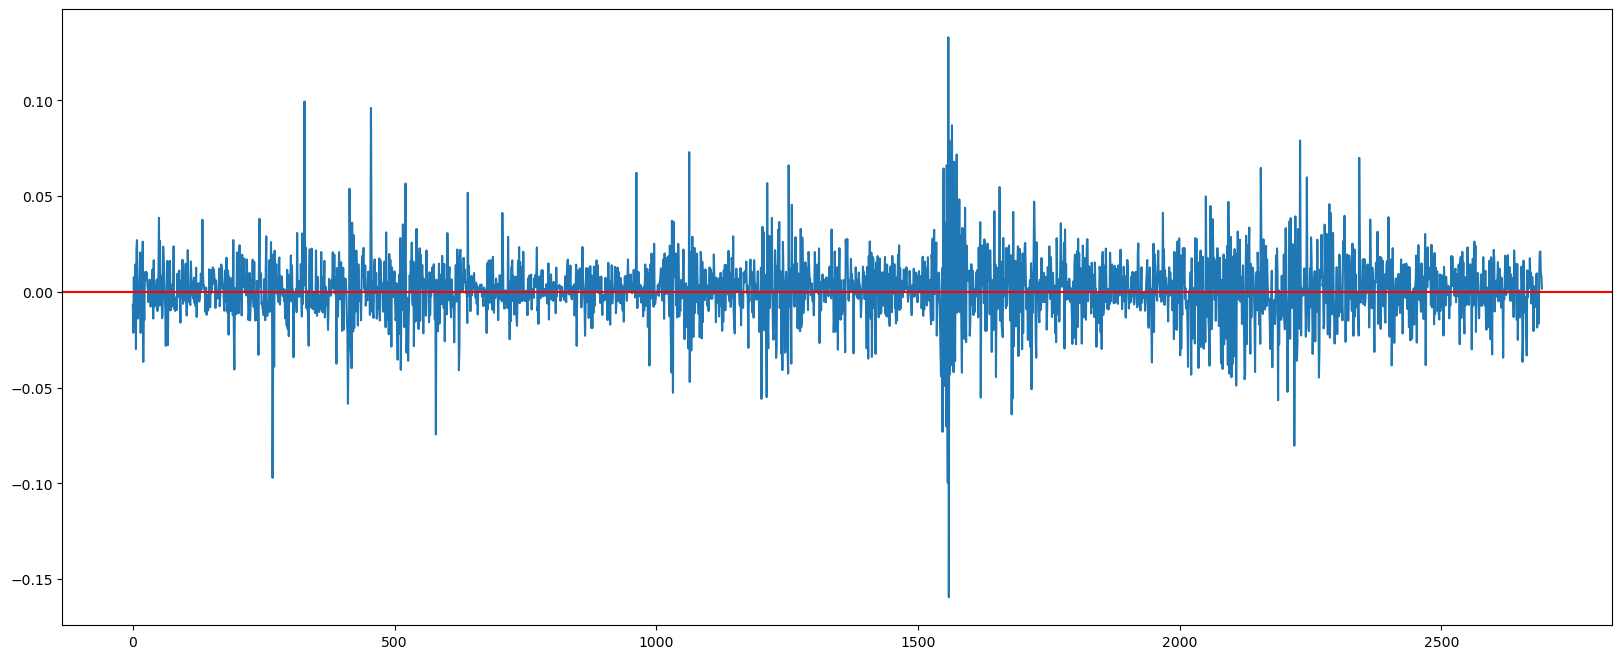

In [63]:
# Plotting Microsoft log return
msft['logReturn'].plot(figsize=(20,8))
plt.axhline(0,color='red')
plt.show()

In [64]:
# Data table
msft.head()

,Exchange Date,Close,Net,%Chg,Open,Low,High,Volume,Turnover - USD,Flow,logReturn
0,02-Jan-14,37.16,NaN,NaN,37.35,37.10,37.40,"30,643,745",NaN,0,-0.006750
1,03-Jan-14,36.91,-0.25,-0.67%,37.20,36.60,37.22,"31,134,795",NaN,0,-0.021359
2,06-Jan-14,36.13,-0.78,-2.11%,36.85,36.11,36.89,"43,615,035",NaN,0,0.007720
3,07-Jan-14,36.41,0.28,0.77%,36.33,36.21,36.49,"35,924,726",NaN,0,-0.018014
4,08-Jan-14,35.76,-0.65,-1.79%,36.00,35.58,36.14,"59,979,542",NaN,0,-0.006453


In [65]:
# Calculate statistical parameters

n = msft['logReturn'].shape[0]                    #sample size
sample_mean = msft['logReturn'].mean()            #sample mean
sample_std=msft['logReturn'].std(ddof=1)/ n*0.5   #sample standard deviation

# If sample size n is large enough, we can use z-distribution instead of t-distribution
# mu = 0 under the null hypothesis

zhat = (sample_mean - 0)/(sample_std/(n**0.5))
print(zhat)

15167.05328845848


In [66]:
#Set decision criteria
#Values for calculating the 90% confidence interval

alpha = 0.05
z_left = norm.ppf(alpha/2,0,1)
z_right = -z_left # z-distribution is symmetric
print(z_left, z_right)


#Make decision - shall we reject H0?
print('At significant level of {}, shall we reject: {}'.format(alpha,zhat>z_right or zhat<z_left))



#Confidence interval for daily return

interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std
print('Sample Mean is ', sample_mean)
print('***************************************')
print('80% confidence interval is ')
print(interval_left, interval_right)

-1.9599639845400545 1.9599639845400545
At significant level of 0.05, shall we reject: True
Sample Mean is  0.0009103838575113989
***************************************
80% confidence interval is 
0.0009042776687932165 0.0009164900462295812


In [67]:
#Hypothesis testing - One Tail test

# step 2
sample_mean = msft['logReturn'].mean()
sample_std = msft['logReturn'].std(ddof=1)
n=msft['logReturn'].shape[0]


zhat = (sample_mean - 0)/(sample_std/n**0.5)
# if sample size n is large enough, we can use z-distribution instead of t-distribution

alpha = 0.05
z_right=norm.ppf(1-alpha,0,1) # using norm from scify stat
print(z_right)
print('At the significance level of {}, shall we reject: {}'.format(alpha,zhat>z_right))


1.6448536269514722
At the significance level of 0.05, shall we reject: True


In [68]:
# An alternative method: p-value

#step 3(p-value)
p=1-norm.cdf(zhat,0,1)
print(p)

0.0024390965191627423


In [69]:
# step 4
print('At the significance level of {}, shall we reject: {}'.format(alpha,p<alpha)) 

At the significance level of 0.05, shall we reject: True


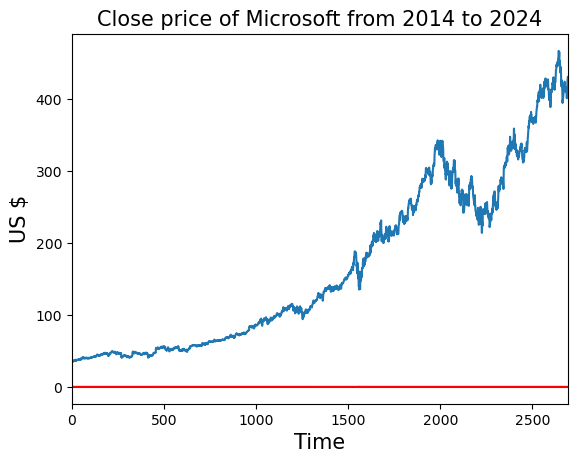

In [70]:
plt.title('Close price of Microsoft from 2014 to 2024', size = 15)

plt.xlabel('Time', size=15)
plt.ylabel('US $', size=15)
plt.plot(msft.loc[:,'Close'])
plt.xlim(msft.index[0],msft.index[-1])
plt.plot(msft.loc[:,'logReturn'])
plt.axhline(0,color='red')

<Axes: title={'center': 'Histogram of daily return of Microsoft from 2014 to 2024'}>

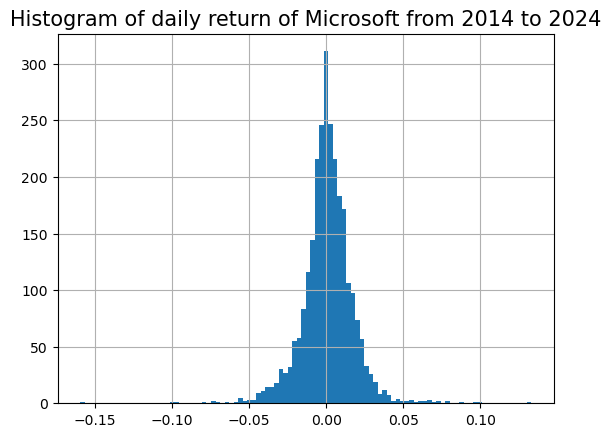

In [71]:
# Histogram of daily return of Microsoft stock

plt.title('Histogram of daily return of Microsoft from 2014 to 2024', size=15)
msft.loc[:,'logReturn'].dropna().hist(bins=100)